In [3]:
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
from keras import layers
import keras
import numpy as np

import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from sklearn.externals import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

from numpy.random import seed
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR

from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

def create_sequences(values, time_steps=128):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)

data = pd.read_csv(f'data/SKAB/anomaly-free/anomaly-free.csv', sep = ';')
data = pd.read_csv(f'/home/gabrieltalasso/IoT_Anomaly_Detection/data/SKAB/valve1/9.csv', sep = ';')
scaler = StandardScaler()


data.index = pd.to_datetime(data['datetime'])
data.drop('datetime', axis = 1, inplace=True)

#train = data[data['anomaly'] == 0]
train = data.copy()
train = train.values
scaler.fit(train)
train = scaler.transform(train)

pca = PCA(n_components=2)
train = pca.fit_transform(train)

#test = data[data['anomaly'] == 1]

#test.drop(['anomaly', 'changepoint'], axis = 1, inplace = True)
#test = test.values
#test = scaler.transform(test)
#time_steps = dataset_size - 1

X = create_sequences(train, time_steps=59)
#X_test = create_sequences(test, time_steps=time_steps)

losses = []
for t in range(2,20):

    X = create_sequences(train, time_steps=59)

    selected = []
    for i in range(1,t):
        selected.append((60-1) * (i-1) + 1 )

    print(selected)
    X = X[selected]
    print(X.shape)


    model = keras.Sequential(
            [
                layers.Input(shape=(X.shape[1], X.shape[2])),#, X.shape[3])),

                #layers.Dropout(rate=0.2),
                layers.Conv1D(
                    filters=32, kernel_size=7, padding="same", strides=1, activation="relu"
                ),

                # layers.Dropout(rate=0.2),
                layers.Conv1D(
                    filters=16, kernel_size=7, padding="same", strides=1, activation="relu"
                ),
                #layers.Conv1D(
                #    filters=8, kernel_size=7, padding="same", strides=1, activation="relu"
                #),
                #layers.Conv1DTranspose(
                #    filters=8, kernel_size=7, padding="same", strides=1, activation="relu"
                #),

                layers.Conv1DTranspose(
                    filters=16, kernel_size=7, padding="same", strides=1, activation="relu"
                ),

                layers.Conv1DTranspose(
                    filters=32, kernel_size=7, padding="same", strides=1, activation="relu"
                ),
                layers.Conv1DTranspose(
                    filters=1, kernel_size=1, padding="same"),

                #layers.Dense(X.shape[2])
            ]
            )


    model.compile(optimizer='adam', loss='mse', run_eagerly=True)

    n_epochs = 20

    hist =  model.fit(X, X,
            epochs = n_epochs, batch_size = 8)
    
    losses.append(hist.history['loss'][-1])

#model.save_weights('./checkpoints/my_checkpoint_PCA')


[1]
(1, 59, 2)
Epoch 1/20
1/1 [==============================] - 0s 28ms/step - loss: 1.4615
Epoch 2/20
1/1 [==============================] - 0s 17ms/step - loss: 1.3900
Epoch 3/20
1/1 [==============================] - 0s 19ms/step - loss: 1.3296
Epoch 4/20
1/1 [==============================] - 0s 22ms/step - loss: 1.2761
Epoch 5/20
1/1 [==============================] - 0s 17ms/step - loss: 1.2268
Epoch 6/20
1/1 [==============================] - 0s 17ms/step - loss: 1.1842
Epoch 7/20
1/1 [==============================] - 0s 20ms/step - loss: 1.1539
Epoch 8/20
1/1 [==============================] - 0s 17ms/step - loss: 1.1352
Epoch 9/20
1/1 [==============================] - 0s 18ms/step - loss: 1.1178
Epoch 10/20
1/1 [==============================] - 0s 17ms/step - loss: 1.0951
Epoch 11/20
1/1 [==============================] - 0s 17ms/step - loss: 1.0667
Epoch 12/20
1/1 [==============================] - 0s 17ms/step - loss: 1.0384
Epoch 13/20
1/1 [=============================

<AxesSubplot:>

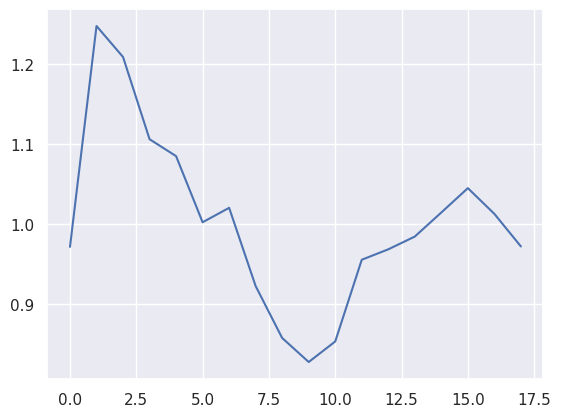

In [4]:
sns.lineplot(losses)

In [32]:
X.shape

(19, 59, 2)